In [75]:
# Import libraries

import pandas as pd
import plfit
import scipy
import scipy.stats as stats
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
# from ggplot import *
# import ggplot as gg
import math

# Suggested by https://fda.readthedocs.io/en/latest/auto_examples/plot_kernel_smoothing.html
import skfda
import skfda.preprocessing.smoothing.kernel_smoothers as ks
from skfda import FDataGrid
# from skfda.misc.hat_matrix import (
#     KNeighborsHatMatrix,
#     LocalLinearRegressionHatMatrix,
#     NadarayaWatsonHatMatrix,
# )
# from skfda.misc.kernels import uniform
# from skfda.preprocessing.smoothing import KernelSmoother
# from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch

In [77]:
# Set color palette

# colors = np.array(['black', '#007C92', '#C74632', '#7F7776', 'saddlebrown', '#734675'])
colors = np.array(['black', '#007C92', '#C74632', '#D1660F', '#7F7776', 'midnightblue', '#734675'])
# colors = np.array(['black', '#007C92', '#C74632', '#D1660F', '#7F7776', '#734675'])

In [78]:
# Read in and average CDFs

cdf_filepath = '/Users/evansherwin/PycharmProjects/MethaneDistributions/CDF_data/'
def readAndAverageCDFs (filename_stub):
    cdf_1 = pd.read_csv(cdf_filepath + filename_stub + '_1.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_2 = pd.read_csv(cdf_filepath + filename_stub + '_2.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_3 = pd.read_csv(cdf_filepath + filename_stub + '_3.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_4 = pd.read_csv(cdf_filepath + filename_stub + '_4.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_5 = pd.read_csv(cdf_filepath + filename_stub + '_5.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_6 = pd.read_csv(cdf_filepath + filename_stub + '_6.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_7 = pd.read_csv(cdf_filepath + filename_stub + '_7.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_8 = pd.read_csv(cdf_filepath + filename_stub + '_8.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_9 = pd.read_csv(cdf_filepath + filename_stub + '_9.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_10 = pd.read_csv(cdf_filepath + filename_stub + '_10.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_final = (cdf_1 + cdf_2 + cdf_3 + cdf_4 + cdf_5 + cdf_6 + cdf_7 + cdf_8 + cdf_9 + cdf_10)/10
    return cdf_final

In [82]:
# Kairos Permian
kairosPermian = readAndAverageCDFs('Kairos PermianPermian basin_production_20221108')
kairosPermianMidstream = readAndAverageCDFs('Kairos PermianPermian basin_midstream_20221108')

# CM Permian 2019
CMPermian2019 = readAndAverageCDFs('P - Permian_2019Permian basin_production_20221108')
CMPermian2019Midstream = readAndAverageCDFs('P - Permian_2019Permian basin_midstream_20221108')

# CM Permian 2020
CMPermian2020 = readAndAverageCDFs('F - GAO_2020Permian basin_production_20221108')
CMPermian2020Midstream = readAndAverageCDFs('F - GAO_2020Permian basin_midstream_20221108')

# CM Permian summer 2021
CMPermian2021Summer = readAndAverageCDFs('E - Permian_2021Permian basin_production_20221108')
CMPermian2021SummerMidstream = readAndAverageCDFs('E - Permian_2021Permian basin_midstream_20221108')

# CM Permian Fall 2021
CMPermian2021Fall = readAndAverageCDFs('J - Permian Fall 2021Permian basin_production_20221108')
CMPermian2021FallMidstream = readAndAverageCDFs('J - Permian Fall 2021Permian basin_midstream_20221108')

# San Joaquin CM 2016
CMCA2016 = readAndAverageCDFs('CA 2016San Joaquin basin_production_20221108')
CMCA2016Midstream = readAndAverageCDFs('CA 2016San Joaquin basin_midstream_20221108')

# San Joaquin 2017
CMCA2017 = readAndAverageCDFs('CA 2017San Joaquin basin_production_20221108')
CMCA2017Midstream = readAndAverageCDFs('CA 2017San Joaquin basin_midstream_20221108')

# San Joaquin CM 2020 COVID
CMCA2020COVID = readAndAverageCDFs('H - COVID_CA_2020San Joaquin basin_production_20221108')
CMCA2020COVIDMidstream = readAndAverageCDFs('H - COVID_CA_2020San Joaquin basin_midstream_20221108')

# San Joaquin CM 2020
CMCA2020 = readAndAverageCDFs('G - CA_2020San Joaquin basin_production_20221108')
CMCA2020Midstream = readAndAverageCDFs('G - CA_2020San Joaquin basin_midstream_20221108')

# San Joaquin CM 2021
CMCA2021 = readAndAverageCDFs('K - CA Fall 2021San Joaquin basin_production_20221108')
CMCA2021Midstream = readAndAverageCDFs('K - CA Fall 2021San Joaquin basin_midstream_20221108')

# DJ Summer 2021
CMDJ2021Summer = readAndAverageCDFs('A - DJ_Summer_2021Denver basin_production_20221108')
CMDJ2021SummerMidstream = readAndAverageCDFs('A - DJ_Summer_2021Denver basin_midstream_20221108')

# DJ Fall 2021
CMDJ2021Fall = readAndAverageCDFs('I - DJ Fall 2021Denver basin_production_20221108')
CMDJ2021FallMidstream = readAndAverageCDFs('I - DJ Fall 2021Denver basin_midstream_20221108')

# Appalachia 2021
CMAppalachia2021 = readAndAverageCDFs('B - NorthEast_2021Appalachian basin (eastern overthrust area)_production_20221111')
CMAppalachia2021Midstream = readAndAverageCDFs('B - NorthEast_2021Appalachian basin (eastern overthrust area)_midstream_20221111')

# Uinta 2020
CMUinta2020 = readAndAverageCDFs('F - GAO_2020Uinta basin_production_20221111')
CMUinta2020Midstream = readAndAverageCDFs('F - GAO_2020Uinta basin_midstream_20221111')

# Kairos Fort Worth
KairosBarnett = readAndAverageCDFs('Kairos BarnettFort Worth basin_production_20221108')
KairosBarnettMidstream = readAndAverageCDFs('Kairos BarnettFort Worth basin_midstream_20221108')

# Overall survey summary stats
surveyStats = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221111b.xlsx', sheet_name="By site", engine = 'openpyxl' )
surveyStats = surveyStats.set_index("Scenario")
surveyStatsByVisit = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221111b.xlsx', sheet_name="By site visit", engine = 'openpyxl' )
surveyStatsNoStrat = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221111b.xlsx', sheet_name="By site no strat", engine = 'openpyxl' )
surveyStatsAerialByCat = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221111b.xlsx', sheet_name="Aerial by source", engine = 'openpyxl' )

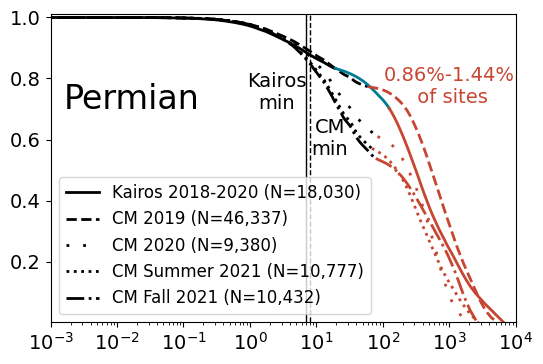

In [83]:
# Cumulative emissions Permian

ax = plt.gca()
# Main plot
KairosFullDetectPermian = np.max(kairosPermian.loc[kairosPermian['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2019', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2019', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2020', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Emission magnitude [kgh]'], kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= surveyStats.loc['Kairos_Permian', 'Transition point']) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetectPermian), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetectPermian, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2019', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2019', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2020', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Permian_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')

# Min detected
min_detect_CM_Permian = [surveyStats.loc['Permian_2019', 'Min detected emission'],
                         surveyStats.loc['Permian_2020', 'Min detected emission'],
                         surveyStats.loc['Permian_fall2021', 'Min detected emission'],
                         surveyStats.loc['Permian_summer2021', 'Min detected emission']]

plt.axvline(surveyStats.loc['Kairos_Permian', 'Min detected emission'], color=colors[0], linestyle="-", lw=1, label="Kairos min detected")
plt.axvline(np.min(min_detect_CM_Permian), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.2, 0.55, 'CM\nmin', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.4, 0.7, 'Kairos\nmin', size=14, color='black', rotation=0, ha='center')


# Fraction sites emitting
fraction_sites_emitting_by_survey_Permian = [surveyStats.loc['Kairos_Permian', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_2019', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_2020', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_fall2021', 'Avg % sites emitting'],
                                     surveyStats.loc['Permian_summer2021', 'Avg % sites emitting']]

plt.text(10**3, 0.72, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_Permian)))
         + '-' + "{:.2%}".format(np.max(fraction_sites_emitting_by_survey_Permian)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

plt.legend(['Kairos 2018-2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Kairos_Permian', 'Sites covered']) + ')',
            'CM 2019 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_2019', 'Sites covered']) + ')',
            'CM 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_2020', 'Sites covered']) + ')',
            'CM Summer 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_fall2021', 'Sites covered']) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Permian_summer2021', 'Sites covered']) + ')'],
           loc='lower left', fontsize=12)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rcParams["figure.figsize"] = 6,4

plt.savefig('Figures/Permian distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [43]:
Kairos_permian_interp = scipy.interpolate.interp1d(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction [%]'])
Kairos_permian_interp(surveyStats.loc['Kairos_Permian', 'Min detected emission']), \
Kairos_permian_interp(surveyStats.loc['Kairos_Permian', 'Transition point']), \
Kairos_permian_interp(surveyStats.loc['Kairos_Permian', 'Min detected emission']) -\
Kairos_permian_interp(surveyStats.loc['Kairos_Permian', 'Transition point'])

# kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= surveyStats.loc['Kairos_Permian', 'Transition point'], 'Cumulative emissions fraction [%]']

(array(0.8847862), array(0.83331656), 0.05146964495335993)

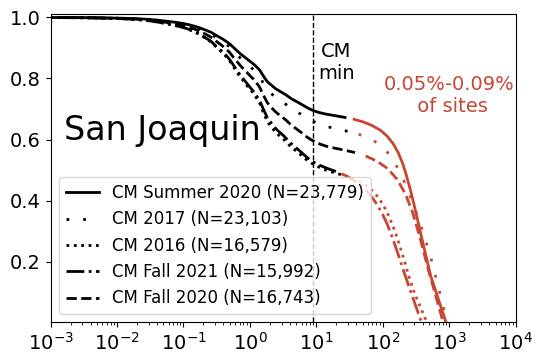

In [84]:
# Cumulative emissions San Joaquin

ax = plt.gca()
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")

# Main plot
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashed")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] <= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] <= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2017', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_2016', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashdot")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashed")

# Min detected
min_detect_CM_San_Joaquin = [surveyStats.loc['San_Joaquin_2016', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_2017', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_fall2020', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_summer2020', 'Min detected emission'],
                             surveyStats.loc['San_Joaquin_fall2021', 'Min detected emission']]

plt.axvline(np.min(min_detect_CM_San_Joaquin), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.3, 0.8, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

fraction_sites_emitting_by_survey_San_Joaquin = [surveyStats.loc['San_Joaquin_2016', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_2017', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_fall2020', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_summer2020', 'Avg % sites emitting'],
                                     surveyStats.loc['San_Joaquin_fall2021', 'Avg % sites emitting']]

plt.text(10**3, 0.69, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_San_Joaquin)))
         + '-' + "{:.2%}".format(np.max(fraction_sites_emitting_by_survey_San_Joaquin)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Summer 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_2016', 'Sites covered']) + ')',
            'CM 2017 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_2017', 'Sites covered']) + ')',
            'CM 2016 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_fall2020', 'Sites covered']) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_summer2020', 'Sites covered']) + ')',
            'CM Fall 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['San_Joaquin_fall2021', 'Sites covered']) + ')'],
            loc='lower left', fontsize=12) # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',

plt.text(10**-2.8, 0.6, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')
plt.rcParams["figure.figsize"] = 6,4

plt.savefig('Figures/San Joaquin distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()


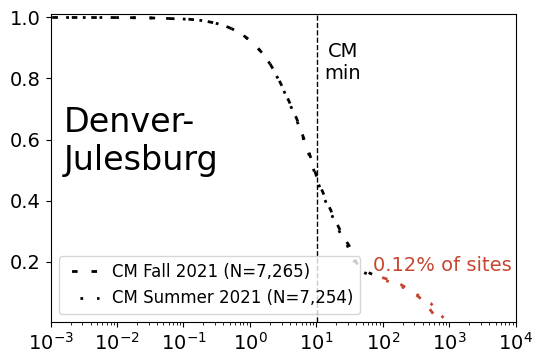

In [85]:
# Cumulative emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_summer2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= surveyStats.loc['Denver_fall2021', 'Transition point'], 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

# Min detected
min_detect_CM_DJ = [surveyStats.loc['Denver_summer2021', 'Min detected emission'],
                             surveyStats.loc['Denver_fall2021', 'Min detected emission']]

plt.axvline(np.min(min_detect_CM_DJ), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.4, 0.8, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

fraction_sites_emitting_by_survey_DJ = [surveyStats.loc['Denver_summer2021', 'Avg % sites emitting'],
                                     surveyStats.loc['Denver_fall2021', 'Avg % sites emitting']]

plt.text(10**2.9, 0.17, str("{:.2%}".format(np.min(fraction_sites_emitting_by_survey_DJ))) + ' of sites', size=14, color=colors[2], rotation=0, ha='center')

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fall 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Denver_fall2021', 'Sites covered']) + ')',
            'CM Summer 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Denver_summer2021', 'Sites covered']) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')
plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/DJ distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [45]:
DJS21_permian_interp = scipy.interpolate.interp1d(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction [%]'])
DJS21_permian_interp(surveyStats.loc['Denver_summer2021', 'Min detected emission']), \
DJS21_permian_interp(surveyStats.loc['Denver_summer2021', 'Transition point']), \
DJS21_permian_interp(surveyStats.loc['Denver_summer2021', 'Min detected emission']) -\
DJS21_permian_interp(surveyStats.loc['Denver_summer2021', 'Transition point'])

(array(0.45523097), array(0.15639804), 0.29883292898903274)

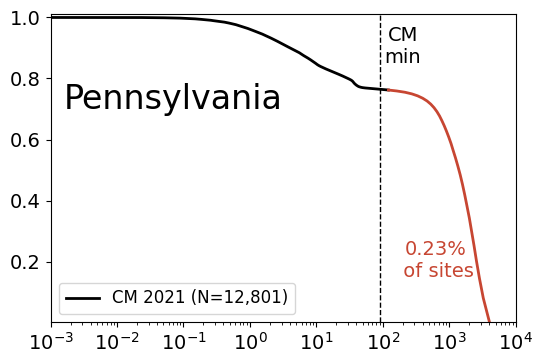

In [86]:
# Cumulative emissions Appalachia

ax = plt.gca()

CMAppalachia2021Buffer = 20
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < surveyStats.loc['Pennsylvania_2021', 'Transition point'] + CMAppalachia2021Buffer, 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < surveyStats.loc['Pennsylvania_2021', 'Transition point'] + CMAppalachia2021Buffer,'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= surveyStats.loc['Pennsylvania_2021', 'Transition point'], 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= surveyStats.loc['Pennsylvania_2021', 'Transition point'],'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2])

# Min detected
plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**2.3, 0.85, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**2.8, 0.15, str("{:.2%}".format(surveyStats.loc['Pennsylvania_2021', 'Avg % sites emitting'])) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Pennsylvania_2021', 'Sites covered']) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')
plt.rcParams["figure.figsize"] = 6,4

plt.savefig('Figures/Pennsylvania distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()

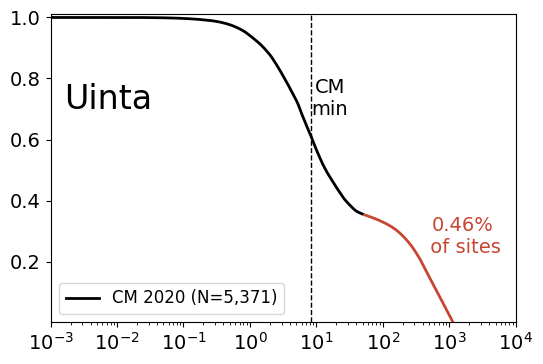

In [87]:
# Cumulative emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= surveyStats.loc['Uinta_2020', 'Transition point'] + 0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= surveyStats.loc['Uinta_2020', 'Transition point'] + 0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= surveyStats.loc['Uinta_2020', 'Transition point'] - 0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= surveyStats.loc['Uinta_2020', 'Transition point'] - 0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# Min detected
plt.axvline(surveyStats.loc['Uinta_2020', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.2, 0.681, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**3.2, 0.23, str("{:.2%}".format(surveyStats.loc['Uinta_2020', 'Avg % sites emitting'])) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

plt.legend(['CM 2020 (N=' + '{:,.0f}'.format(surveyStats.loc['Uinta_2020', 'Sites covered']) + ')'],
           loc='lower left', fontsize=12)
plt.rcParams["figure.figsize"] = 6,4

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Figures/Uinta distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()

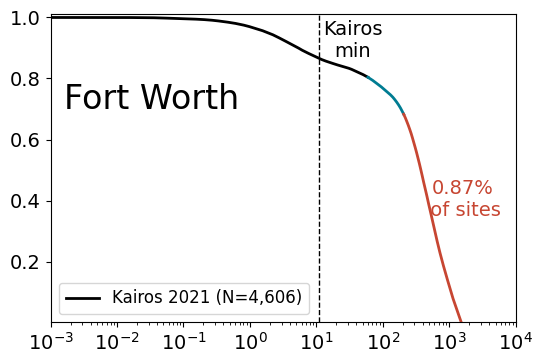

In [88]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Main plot
KairosBarnettBuffer = 10
KairosFullDetectBarnett = np.max(KairosBarnett.loc[KairosBarnett['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= surveyStats.loc['Fort_Worth_2021', 'Transition point'] + KairosBarnettBuffer, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= surveyStats.loc['Fort_Worth_2021', 'Transition point'] + KairosBarnettBuffer, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= surveyStats.loc['Fort_Worth_2021', 'Transition point']) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetectBarnett + KairosBarnettBuffer), 'Emission magnitude [kgh]'], KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= surveyStats.loc['Fort_Worth_2021', 'Transition point']) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetectBarnett + KairosBarnettBuffer), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetectBarnett, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetectBarnett, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.text(10**-2.8, 0.7, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# Min detected
plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Min detected emission'], color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.55, 0.87, 'Kairos\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**3.2, 0.35, str("{:.2%}".format(surveyStats.loc['Fort_Worth_2021', 'Avg % sites emitting'])) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

plt.legend(['Kairos 2021 (N=' + '{:,.0f}'.format(surveyStats.loc['Fort_Worth_2021', 'Sites covered']) + ')'],
           loc='lower left', fontsize=12)
plt.rcParams["figure.figsize"] = 6,4

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Figures/Fort Worth distribution 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.show()

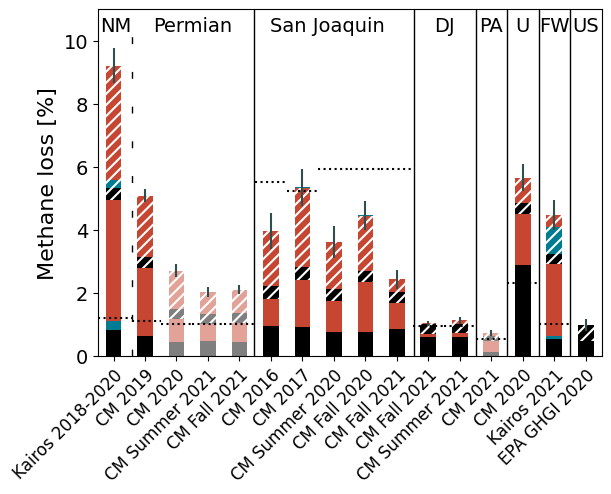

In [90]:

ax = plt.gca()
campaigns_to_include = ["Kairos_Permian", "Permian_2019", "Permian_2020", "Permian_fall2021",
                        "Permian_summer2021", "San_Joaquin_2016", "San_Joaquin_2017", "San_Joaquin_fall2020",
                        "San_Joaquin_summer2020", "San_Joaquin_fall2021", "Denver_summer2021", "Denver_fall2021",
                        "Pennsylvania_2021", "Uinta_2020", "Fort_Worth_2021", "GHGI 2022 (for 2020)"]

comprehensive_campaign = ["Kairos_Permian", "Permian_2019", "San_Joaquin_2016", "San_Joaquin_2017",
                          "San_Joaquin_fall2020", "San_Joaquin_summer2020", "San_Joaquin_fall2021",
                          "Denver_summer2021", "Denver_fall2021", "Uinta_2020", "Fort_Worth_2021", "GHGI 2022 (for 2020)"]
high_productivity_campaign = ["Permian_2020", "Permian_fall2021",
                        "Permian_summer2021", "Pennsylvania_2021"]

surveyStats_to_include = surveyStats.loc[campaigns_to_include]

# fractionalLossDF = surveyStats_to_include.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "High prod", 'FracLossP2.5', 'FracLossP97.5']]
fractionalLossDF = surveyStats_to_include.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid", 'FracLossP2.5', 'FracLossP97.5']]
# fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]] = 100*fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]]
fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid"]] = 100*fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid"]]
fractionalLossDFHP = fractionalLossDF.copy()
fractionalLossDFHP.loc[high_productivity_campaign] = 0
# fractionalLossDFByVisit = 100*surveyStatsVisit.loc[campaigns_to_include, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]]
# fractionalLossDF.index = surveyStats_to_include["Basin/Campaign"]

errorbars = np.concatenate((np.zeros([7, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
# high_productivity_col = fractionalLossDF["High prod"].transpose().to_numpy()
# alpha_productivity = np.concatenate(high_productivity_col, np.concatenate(high_productivity_col, np.concatenate(high_productivity_col, np.concatenate(np.concatenate(high_productivity_col,(high_productivity_col)),(high_productivity_col)))))
# high_productivity_col = fractionalLossDF["High prod"].transpose().to_numpy()# high_productivity_col
# alpha_productivity = np.repeat(high_productivity_col, 6, axis=0).reshape((16,6)).transpose()
fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], yerr=errorbars, error_kw=dict(ecolor='darkslategray'), ax=ax) # error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2)
# fractionalLossPlotHP = fractionalLossDFHP.plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], alpha=0.7, yerr=errorbars, ax=ax) #, cmap=alpha_productivity
# fractionalLossPlotHP = fractionalLossDF.loc[high_productivity_campaign].plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], alpha=0.5, ax=ax)
# plt.errorbar(mean=surveyStats_to_include['Methane fractional loss total'], yerr=surveyStats_to_include['FracLossP2.5', 'FracLossP97.5'].transpose().to_numpy())
plt.yticks(fontsize=14)
plt.ylabel('Methane loss [%]', size=16)

# # Set hatches
# hatches = np.concatenate(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"]))
# hatches = np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"])))))
# hatches = np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"])))))
# midstream_hatches = np.array(['\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\'])                                                                                                                                                     # 'midstream_hatches = np.array('\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\',midstream_hatches = np.array(['\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\'])
midstream_hatches = np.array(['///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///'])

hatches =  np.append(np.zeros(fractionalLossDF.shape[0]*3) == 1, midstream_hatches)
for patch, hatch in zip(fractionalLossPlot.patches, hatches):
   patch.set_hatch(hatch)
for patch in np.arange(len(fractionalLossPlot.patches)):
    if (patch % 16 == 2) | (patch % 16 == 3) | (patch % 16 == 4) | (patch % 16 == 12):
        fractionalLossPlot.patches[patch].set_alpha(0.5)

# for patch, hatch in zip(fractionalLossPlotHP.patches, hatches):
#    patch.set_hatch(hatch)
#    patch.set_alpha(1)
plt.rcParams['hatch.linewidth'] = 1.5 # 1.5
plt.rcParams['hatch.color'] = 'white'

plt.xlabel('')
# plt.ylim(0, 6)
plt.ylim(0, 11)
# fractionalLossPlot.set_xticklabels(fractionalLossPlot.get_xticklabels(), fontsize=14, rotation=45, horizontalalignment='right', rotation_mode='anchor')
fractionalLossPlot.set_xticklabels(['Kairos 2018-2020', 'CM 2019', 'CM 2020', 'CM Summer 2021', 'CM Fall 2021', 'CM 2016', 'CM 2017', 'CM Summer 2020', 'CM Fall 2020', 'CM Fall 2021', 'CM Fall 2021', 'CM Summer 2021', 'CM 2021', 'CM 2020', 'Kairos 2021', 'EPA GHGI 2020'], fontsize=12, rotation=45, horizontalalignment='right', rotation_mode='anchor')
# letterheight = 5.6
letterheight = 10.3
plt.text(0.07, letterheight, 'NM', fontsize=14, color='black', rotation=0, ha='center') # -63
plt.text(2.5, letterheight, 'Permian', fontsize=14, color='black', rotation=0, ha='center') # -63
plt.text(6.8, letterheight, 'San Joaquin', fontsize=14, color='black', rotation=0, ha='center') # -70
plt.text(10.5, letterheight, 'DJ', fontsize=14, color='black', rotation=0, ha='center') # -64
plt.text(12, letterheight, 'PA', fontsize=14, color='black', rotation=0, ha='center') # -68
plt.text(13, letterheight, 'U', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.text(14.01, letterheight, 'FW', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.text(15, letterheight, 'US', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.axvline(0.6, ls=(0, (5, 20)), linewidth=1, color='black', ymin=-70) # '--'
plt.axvline(4.45, ls='-', linewidth=1, color='black', ymin=-70)
# plt.axvline(6.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.55, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(11.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(12.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(13.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(14.5, ls='-', linewidth=1, color='black', ymin=-70)

# plt.hlines(surveyStats.loc['Kairos_Permian', 'State GHGI']*100, xmin=0, xmax=0.07)
# Plot GHGI lines
plt.hlines(surveyStats.loc['Kairos_Permian', 'State GHGI']*100,
           -0.5, 0.6, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_2019', 'State GHGI']*100,
           0.6, 1.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_2020', 'State GHGI']*100,
           1.5, 2.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_fall2021', 'State GHGI']*100,
           2.5, 3.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Permian_summer2021', 'State GHGI']*100,
           3.5, 4.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_2016', 'State GHGI']*100,
           4.5, 5.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_2017', 'State GHGI']*100,
           5.5, 6.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_summer2020', 'State GHGI']*100,
           6.5, 7.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_fall2020', 'State GHGI']*100,
           7.5, 8.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['San_Joaquin_fall2021', 'State GHGI']*100,
           8.5, 9.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Denver_summer2021', 'State GHGI']*100,
           9.5, 10.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc['Denver_fall2021', 'State GHGI']*100,
           10.5, 11.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Pennsylvania_2021", 'State GHGI']*100,
           11.5, 12.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Uinta_2020", 'State GHGI']*100,
           12.5, 13.5, color=colors[0], linestyles='dotted')
plt.hlines(surveyStats.loc["Fort_Worth_2021", 'State GHGI']*100,
           13.5, 14.5, color=colors[0], linestyles='dotted')
# plt.hlines(np.min(surveyStats.loc[['Permian_2019', 'Permian_2020', 'Permian_fall2021',
#                                    'Permian_summer2021'], 'State GHGI'])*100,
#            0.6, 4.45, color=colors[0], linestyles='dotted')
# plt.hlines(np.max(surveyStats.loc[['Permian_2019', 'Permian_2020', 'Permian_fall2021',
#                                    'Permian_summer2021'], 'State GHGI'])*100,
#            0.6, 4.45, color=colors[0], linestyles='dotted')
# plt.hlines(np.min(surveyStats.loc[["San_Joaquin_2016", "San_Joaquin_2017", "San_Joaquin_fall2020",
#                         "San_Joaquin_summer2020", "San_Joaquin_fall2021"], 'State GHGI'])*100,
#            4.45, 9.55, color=colors[0], linestyles='dotted')
# plt.hlines(np.max(surveyStats.loc[["San_Joaquin_2016", "San_Joaquin_2017", "San_Joaquin_fall2020",
#                         "San_Joaquin_summer2020", "San_Joaquin_fall2021"], 'State GHGI'])*100,
#            4.45, 9.55, color=colors[0], linestyles='dotted')
# plt.hlines(np.min(surveyStats.loc[["Denver_summer2021", "Denver_fall2021"], 'State GHGI'])*100,
#            9.55, 11.5, color=colors[0], linestyles='dotted')
# plt.hlines(np.max(surveyStats.loc[["Denver_summer2021", "Denver_fall2021"], 'State GHGI'])*100,
#            9.55, 11.5, color=colors[0], linestyles='dotted')
plt.legend([])
fractionalLossPlot.get_legend().remove()
plt.rcParams["figure.figsize"] = 6.5, 4.5 # 5.75,4.5
plt.savefig('Figures/Loss rates 20221111.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Loss rates by visit 20221018.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Loss rates no strat 20220919.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [51]:
surveyStats.loc['Kairos_Permian', 'State GHGI']*100

1.20110797344683

Separate production distributions

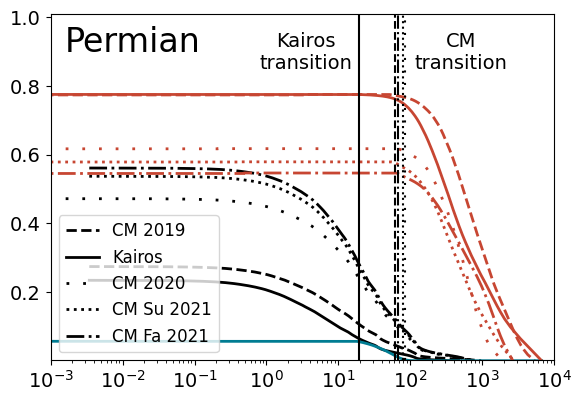

In [91]:
# Cumulative emissions Permian separate distributions

ax = plt.gca()

# Main plot
plt.semilogx(CMPermian2019['Emission magnitude Rutherford [kgh]'], CMPermian2019['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude Rutherford [kgh]'], CMPermian2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude Rutherford [kgh]'], CMPermian2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude Rutherford [kgh]'], CMPermian2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude [kgh]'], CMPermian2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='dashdot')

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="-", lw=1.5, label="Kairos min detected")
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)), lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5, label="CM min detected")
plt.text(10**2.7, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.55, 0.85, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.legend(['CM 2019',
            'Kairos',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(0.001, 1.01)
# ax.set_ylim(10**0, 10**6)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.9, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Permian distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()



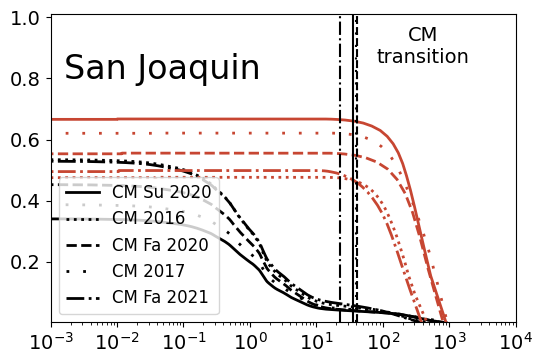

In [92]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()

# Main plot
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="dashdot")

plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="-", lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)))
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5)
plt.text(10**2.6, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.8, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/San Joaquin distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()


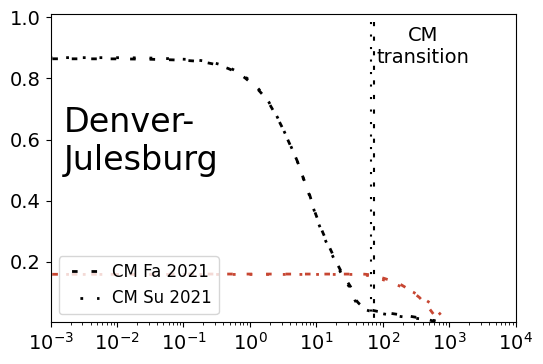

In [93]:
# Cumulative emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle=(5, (2, 5)), lw=1.5)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[0], linestyle=(1, (1, 5)), lw=1.5)
plt.text(10**2.6, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/DJ distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

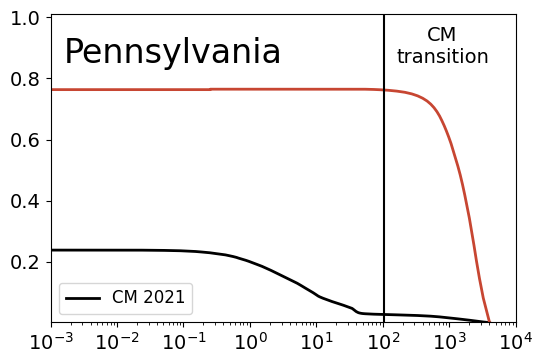

In [94]:
# Cumulative emissions Appalachia

ax = plt.gca()


plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2])

plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**2.9, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.85, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Pennsylvania distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

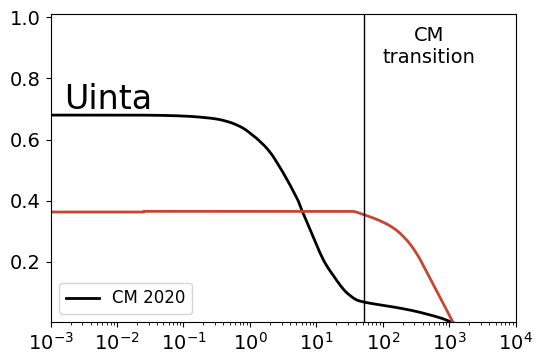

In [95]:
# Cumulative emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='-', lw=1)
plt.text(10**2.7, 0.85, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Uinta distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

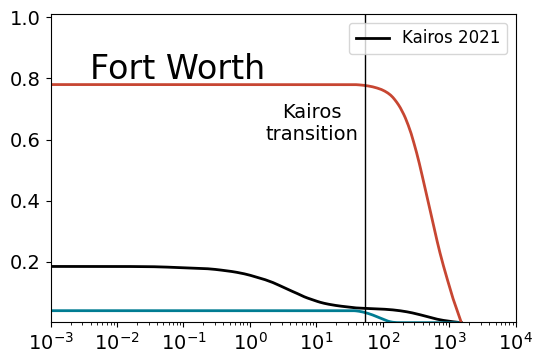

In [96]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Fraction sites emitting
# plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction aerial [%]'].shift(-1, fill_value=0), linewidth=2, color=colors[2], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1)
plt.text(10**0.93, 0.6, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')
plt.legend(['Kairos 2021'],
           loc='upper right', fontsize=12)
plt.text(10**-2.4, 0.8, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Fort Worth distribution separate 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

Midstream emissions distributions

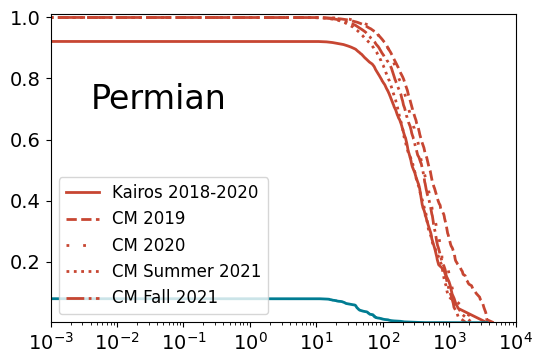

In [97]:
# Cumulative midstream emissions Permian

ax = plt.gca()

# Main plot
plt.semilogx(kairosPermianMidstream['Emission magnitude [kgh]'], kairosPermianMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMPermian2019Midstream['Emission magnitude [kgh]'], CMPermian2019Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMPermian2020Midstream['Emission magnitude [kgh]'], CMPermian2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021SummerMidstream['Emission magnitude [kgh]'], CMPermian2021SummerMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021FallMidstream['Emission magnitude [kgh]'], CMPermian2021FallMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')
plt.semilogx(kairosPermianMidstream['Emission magnitude [kgh]'], kairosPermianMidstream['Cumulative partial emissions fraction [%]'], linewidth=2, color=colors[1], linestyle="solid")

# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')

plt.legend(['Kairos 2018-2020',
            'CM 2019',
            'CM 2020',
            'CM Summer 2021',
            'CM Fall 2021'],
           loc='lower left', fontsize=12)# Min detected

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/Permian midstream distribution 2022112.pdf', format='pdf', bbox_inches="tight")
# plt.show()
#


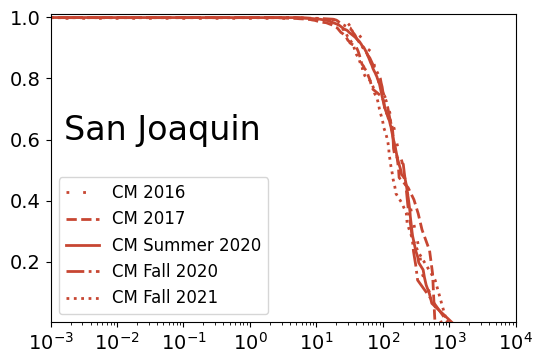

In [98]:
# Cumulative midstream emissions San Joaquin

ax = plt.gca()

# Main plot
plt.semilogx(CMCA2016Midstream['Emission magnitude [kgh]'], CMCA2016Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2017Midstream['Emission magnitude [kgh]'], CMCA2017Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMCA2020COVIDMidstream['Emission magnitude [kgh]'], CMCA2020COVIDMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020Midstream['Emission magnitude [kgh]'], CMCA2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')
plt.semilogx(CMCA2021Midstream['Emission magnitude [kgh]'], CMCA2021Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')


ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2016',
            'CM 2017',
            'CM Summer 2020',
            'CM Fall 2020',
            'CM Fall 2021'],
            loc='lower left', fontsize=12) # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',

plt.text(10**-2.8, 0.6, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/San Joaquin midstream distribution 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()


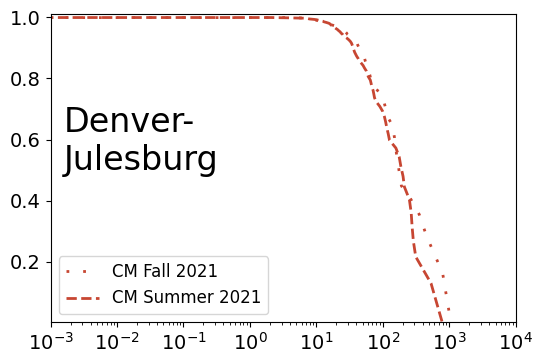

In [99]:
# Cumulative midstream emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021SummerMidstream['Emission magnitude [kgh]'], CMDJ2021SummerMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMDJ2021FallMidstream['Emission magnitude [kgh]'], CMDJ2021FallMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fall 2021',
            'CM Summer 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/DJ midstream distribution 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

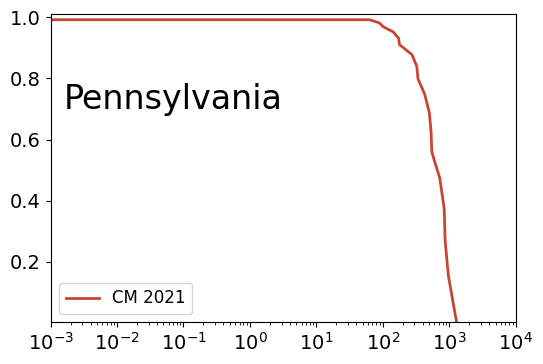

In [100]:
# Cumulative midstream emissions Appalachia

ax = plt.gca()

plt.semilogx(CMAppalachia2021Midstream['Emission magnitude [kgh]'], CMAppalachia2021Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='-')

ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/Pennsylvania midstream distribution 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

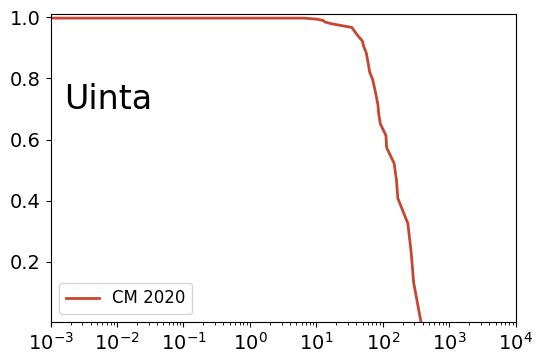

In [101]:
# Cumulative midstream emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020Midstream['Emission magnitude [kgh]'], CMUinta2020Midstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='-')
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)

plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/Uinta midstream distribution 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

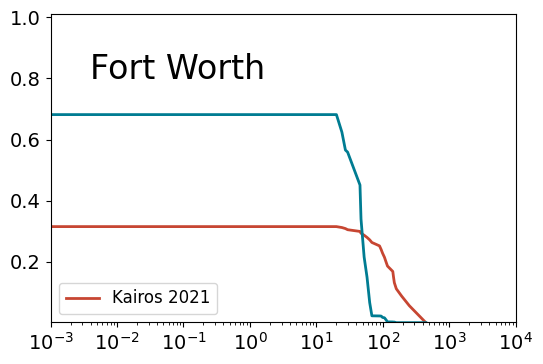

In [104]:
# Cumulative midstream emissions Fort Worth

ax = plt.gca()

# Main plot
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative aerial emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative partial emissions fraction [%]'], linewidth=2, color=colors[1], linestyle="solid")
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.8, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = 6,4
plt.savefig('Figures/Fort Worth midstream distribution 2022112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

Loglog cumulative emissions distributions

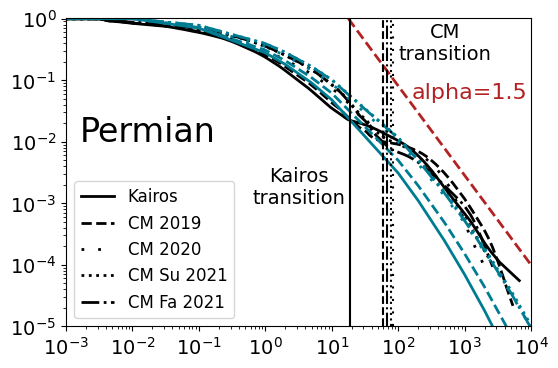

In [105]:
# Cumulative emissions Permian loglog distributions

ax = plt.gca()

# Loglog of full distribution, adds min cumulative fraction to ensure the largest emission isn't set to zero cumulative fraction of sites
plt.loglog(kairosPermian['Emission magnitude [kgh]'], (1 - kairosPermian['Cumulative fraction of sites inc partial detect'] + kairosPermian.loc[0, 'Cumulative fraction of sites']),linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMPermian2019['Emission magnitude [kgh]'], 1 - CMPermian2019['Cumulative fraction of sites'] + CMPermian2019.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashed')
plt.loglog(CMPermian2020['Emission magnitude [kgh]'], 1 - CMPermian2020['Cumulative fraction of sites'] + CMPermian2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMPermian2021Summer['Emission magnitude [kgh]'], 1 - CMPermian2021Summer['Cumulative fraction of sites'] + CMPermian2021Summer.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dotted')
plt.loglog(CMPermian2021Fall['Emission magnitude [kgh]'], 1 - CMPermian2021Fall['Cumulative fraction of sites'] + CMPermian2021Fall.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashdot')

# Lognormal fits
KairosNMLogNormal = scipy.stats.lognorm.fit(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2019LogNormal = scipy.stats.lognorm.fit(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2020LogNormal = scipy.stats.lognorm.fit(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianS2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianF2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfKairosNM = scipy.stats.lognorm.cdf(x=xx, s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2])
lognormCdfCM2019 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2])
lognormCdfCM2020 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2020LogNormal[2])
lognormCdfCMS2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2])
lognormCdfCMF2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfKairosNM, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCM2019, linewidth=2, color=colors[1], linestyle='dashed')
plt.loglog(xx, 1 - lognormCdfCM2020, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCMS2021, linewidth=2, color=colors[1], linestyle='dotted')
plt.loglog(xx, 1 - lognormCdfCMF2021, linewidth=2, color=colors[1], linestyle='dashdot')

# Power law approximation
plt.loglog([10**1.25, 10**4], [10**0, 10**-4],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-1.3, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="-", lw=1.5, label="Kairos min detected")
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)), lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5, label="CM min detected")
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5, label="CM min detected")
plt.text(10**2.7, 10**-0.67, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.5, 10**-3, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.legend(['Kairos',
            'CM 2019',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(10**-5, 1.01)
# ax.set_ylim(10**0, 10**6)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.text(10**-2.8, 10**-2, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Permian distribution loglog 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

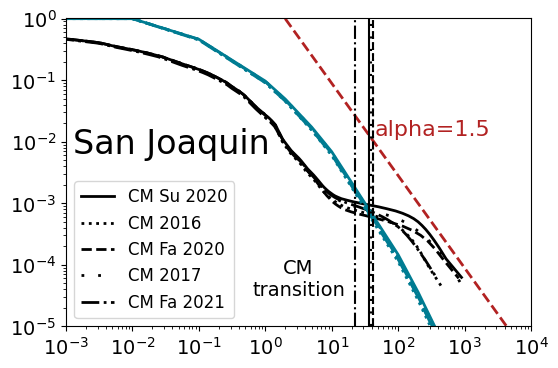

In [106]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()

# Loglog of full distribution, adds min cumulative fraction to ensure the largest emission isn't set to zero cumulative fraction of sites
plt.loglog(CMCA2020COVID['Emission magnitude [kgh]'], 1 - CMCA2020COVID['Cumulative fraction of sites'] + CMCA2020COVID.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMCA2016['Emission magnitude [kgh]'], 1 - CMCA2016['Cumulative fraction of sites'] + CMCA2016.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dotted")
plt.loglog(CMCA2020['Emission magnitude [kgh]'], 1 - CMCA2020['Cumulative fraction of sites'] + CMCA2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashed")
plt.loglog(CMCA2017['Emission magnitude [kgh]'], 1 - CMCA2017['Cumulative fraction of sites'] + CMCA2017.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMCA2021['Emission magnitude [kgh]'], 1 - CMCA2021['Cumulative fraction of sites'] + CMCA2021.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashdot")

CA2020COVIDLogNormal = scipy.stats.lognorm.fit(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2016LogNormal = scipy.stats.lognorm.fit(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CAF2020LogNormal = scipy.stats.lognorm.fit(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2017LogNormal = scipy.stats.lognorm.fit(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2021LogNormal = scipy.stats.lognorm.fit(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfCACOVID = scipy.stats.lognorm.cdf(x=xx, s=CA2020COVIDLogNormal[0], loc=CA2020COVIDLogNormal[1], scale=CA2020COVIDLogNormal[2])
lognormCdfCA2016 = scipy.stats.lognorm.cdf(x=xx, s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2016LogNormal[2])
lognormCdfCAFall = scipy.stats.lognorm.cdf(x=xx, s=CAF2020LogNormal[0], loc=CAF2020LogNormal[1], scale=CAF2020LogNormal[2])
lognormCdfCA2017 = scipy.stats.lognorm.cdf(x=xx, s=CA2017LogNormal[0], loc=CA2017LogNormal[1], scale=CA2017LogNormal[2])
lognormCdfCA2021 = scipy.stats.lognorm.cdf(x=xx, s=CA2021LogNormal[0], loc=CA2021LogNormal[1], scale=CA2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfCACOVID, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCA2016, linewidth=2, color=colors[1], linestyle="dotted")
plt.loglog(xx, 1 - lognormCdfCAFall, linewidth=2, color=colors[1], linestyle="dashed")
plt.loglog(xx, 1 - lognormCdfCA2017, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCA2021, linewidth=2, color=colors[1], linestyle="dashdot")


# Power law approximation
plt.loglog([10**0.3, 10**4.3], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**1.65, 10**-1.9, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')


plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="-", lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[0], linestyle='dashed', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[0], linestyle=(0, (1, 5)))
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[0], linestyle='dotted', lw=1.5)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[0], linestyle="dashdot", lw=1.5)
plt.text(10**0.5, 10**-4.5, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.9, 10**-2.2, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/San Joaquin distribution loglog 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

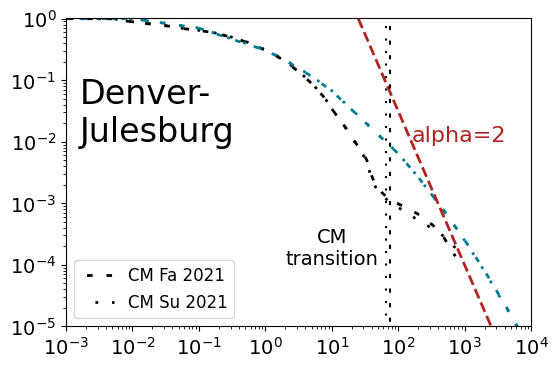

In [107]:
# Cumulative emissions DJ

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMDJ2021Summer['Emission magnitude [kgh]'], 1 - CMDJ2021Summer['Cumulative fraction of sites'] + CMDJ2021Summer.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.loglog(CMDJ2021Fall['Emission magnitude [kgh]'], 1 - CMDJ2021Fall['Cumulative fraction of sites'] + CMDJ2021Fall.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))

# Lognormal fits
DJSummerLogNormal = scipy.stats.lognorm.fit(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
DJFallLogNormal = scipy.stats.lognorm.fit(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfDJSummer = scipy.stats.lognorm.cdf(x=xx, s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2])
lognormCdfDJFall = scipy.stats.lognorm.cdf(x=xx, s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2])
plt.loglog(xx, 1 - lognormCdfDJSummer, linewidth=2, color=colors[1], linestyle=(5, (2, 5)))
plt.loglog(xx, 1 - lognormCdfDJFall, linewidth=2, color=colors[1], linestyle=(1, (1, 5)))

# Power law approximation
plt.loglog([10**1.4, 10**3.4], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-2, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle=(5, (2, 5)), lw=1.5)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[0], linestyle=(1, (1, 5)), lw=1.5)
plt.text(10**1, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/DJ distribution loglog 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

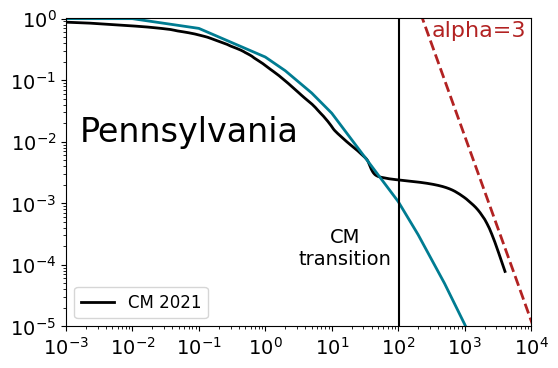

In [108]:
# Cumulative emissions Appalachia

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMAppalachia2021['Emission magnitude [kgh]'], 1 - CMAppalachia2021['Cumulative fraction of sites'] + CMAppalachia2021.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0])

# Lognormal fits
PennsylvaniaLogNormal = scipy.stats.lognorm.fit(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfPA = scipy.stats.lognorm.cdf(x=xx, s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfPA, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**1.7, 10**4.7], [10**2, 10**-7],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.5, 10**-0.3, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**1.2, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Pennsylvania distribution loglog 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

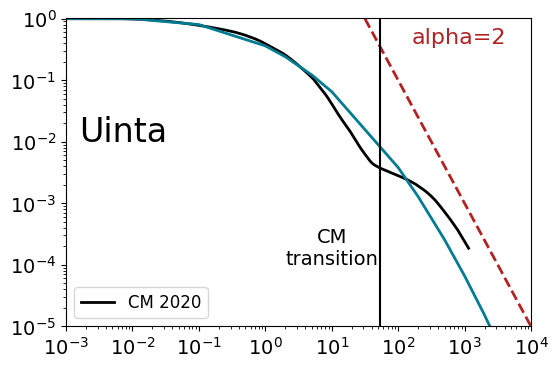

In [109]:
# Cumulative emissions Uinta

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMUinta2020['Emission magnitude [kgh]'], 1 - CMUinta2020['Cumulative fraction of sites'] + CMUinta2020.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Lognormal fits
UintaLogNormal = scipy.stats.lognorm.fit(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfUinta = scipy.stats.lognorm.cdf(x=xx, s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfUinta, linewidth=2, color=colors[1])

# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# Power law approximation
plt.loglog([10**1.5, 10**4.5], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**1, 10**-4, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Uinta distribution loglog 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()


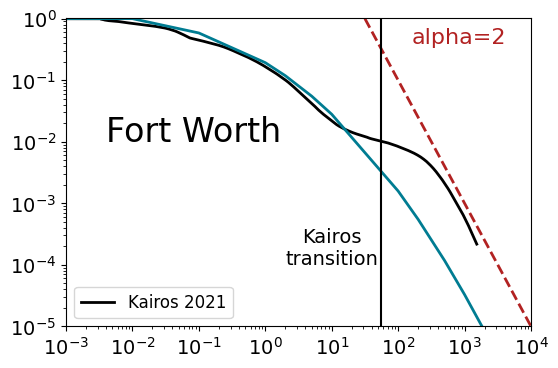

In [150]:
# Cumulative loglog emissions Fort Worth

ax = plt.gca()

# Loglog of full distribution
plt.loglog(KairosBarnett['Emission magnitude [kgh]'], 1 - KairosBarnett['Cumulative fraction of sites inc partial detect'] + KairosBarnett.loc[0, 'Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")
BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2])
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**1.5, 10**4], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='-', lw=1.5)
plt.text(10**1, 10**-4, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')
# plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
# plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-5, 1.01)
# ax.set_ylim(10**-1, 10**0)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 10**-2, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

plt.rcParams["figure.figsize"] = (6,4)
plt.savefig('Figures/Fort Worth distribution loglog 20221112b.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [151]:
# Compute means of fitted lognormal distributions

sample_size = 1000000
[scipy.stats.lognorm.rvs(s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2019LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2020COVIDLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CA2017LogNormal[0], loc=CA2017LogNormal[1], scale=CA2017LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CA2020COVIDLogNormal[0], loc=CA2020COVIDLogNormal[1], scale=CA2020COVIDLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CAF2020LogNormal[0], loc=CAF2020LogNormal[1], scale=CAF2020LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=CA2021LogNormal[0], loc=CA2021LogNormal[1], scale=CA2021LogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2], size=sample_size).mean(),
scipy.stats.lognorm.rvs(s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2], size=sample_size).mean()]

# [scipy.stats.lognorm.mean(KairosNMLogNormal)[0],
# scipy.stats.lognorm.mean(CMPermian2019LogNormal)[0],
# scipy.stats.lognorm.mean(CMPermian2020LogNormal)[0],
# scipy.stats.lognorm.mean(CMPermianS2021LogNormal)[0],
# scipy.stats.lognorm.mean(CMPermianF2021LogNormal)[0],
# scipy.stats.lognorm.mean(CA2020COVIDLogNormal)[0],
# scipy.stats.lognorm.mean(CA2016LogNormal)[0],
# scipy.stats.lognorm.mean(CAF2020LogNormal)[0],
# scipy.stats.lognorm.mean(CA2017LogNormal)[0],
# scipy.stats.lognorm.mean(CA2021LogNormal)[0],
# scipy.stats.lognorm.mean(DJSummerLogNormal)[0],
# scipy.stats.lognorm.mean(DJFallLogNormal)[0],
# scipy.stats.lognorm.mean(PennsylvaniaLogNormal)[0],
# scipy.stats.lognorm.mean(UintaLogNormal)[0],
# scipy.stats.lognorm.mean(BarnettLogNormal)[0]]

[2.8701828266401637,
 3.8626357651107774,
 5.269763918894178,
 7.61929853180111,
 7.266330264738741,
 0.5148364427160355,
 0.5415665713115577,
 0.547298664770685,
 0.5225160710913517,
 0.5072276601273616,
 4.675228267642524,
 4.5655860285462895,
 1.6708414804172553,
 3.59436889016232,
 1.712899244408707]

In [124]:
BarnettLogNormal

(2.2148673642833403, 0.009973227974315494, 0.14483944231252344)

In [111]:
# CDF to PDF

def ecdfToLogLogPDF (df, knot_numbers=100):
    # Source: https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
    knot_numbers = knot_numbers
    x = np.log(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = np.log(df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites'])
    x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
    q_knots = np.quantile(x, x_new)
    # q_knots
    t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
    # kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
    # yfit = interpolate.BSpline(t,c,k)(x)
    x_even_log_space = np.arange(-10, 6.1, 0.1)
    yfit_even = pd.DataFrame(interpolate.BSpline(t,c,k)(x_even_log_space)).diff()[0]
    return x_even_log_space, yfit_even

In [ ]:
knot_numbers = 100
x = np.log(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = np.log(df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites'])
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_new)
# t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
# x_even_log_space = np.arange(-10, 6.1, 0.1)
# yfit_even = pd.DataFrame(interpolate.BSpline(t,c,k)(x_even_log_space)).diff()[0]

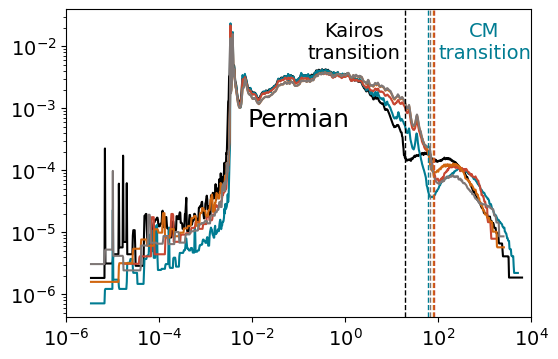

In [112]:
# Permian PDFs

selected_dfs = [kairosPermian, CMPermian2019, CMPermian2020, CMPermian2021Summer, CMPermian2021Fall]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    # Simulation-only PDFs
    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)

# Transition points
plt.axvline(surveyStats.loc['Kairos_Permian', 'Transition point'], color=colors[0], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_2019', 'Transition point'], color=colors[1], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_2020', 'Transition point'], color=colors[2], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_fall2021', 'Transition point'], color=colors[3], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['Permian_summer2021', 'Transition point'], color=colors[4], linestyle="--", lw=1)
plt.text(10**3, 10**-2.2, 'CM\ntransition', size=14, color=colors[1], rotation=0, ha='center')
plt.text(10**0.2, 10**-2.2, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-3.3, 'Permian', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/Permian PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

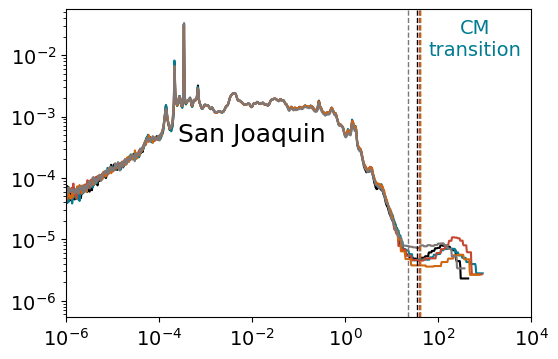

In [113]:
# CA PDFs
selected_dfs = [CMCA2016, CMCA2017, CMCA2020COVID, CMCA2020, CMCA2021]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['San_Joaquin_summer2020', 'Transition point'], color=colors[0], linestyle="--", lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_2016', 'Transition point'], color=colors[1], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_fall2020', 'Transition point'], color=colors[2], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_2017', 'Transition point'], color=colors[3], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['San_Joaquin_fall2021', 'Transition point'], color=colors[4], linestyle="--", lw=1)
plt.text(10**2.8, 10**-2, 'CM\ntransition', size=14, color=colors[1], rotation=0, ha='center')

plt.text(10**-2, 10**-3.4, 'San Joaquin', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/San Joaquin PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

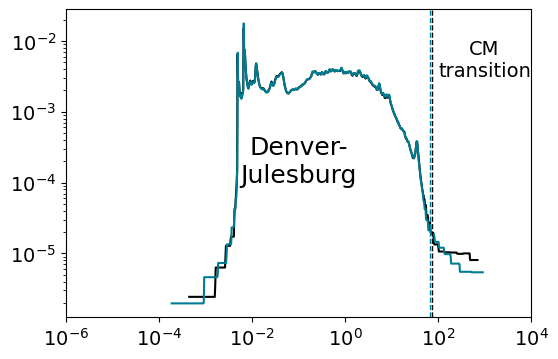

In [114]:
# DJ PDFs
selected_dfs = [CMDJ2021Summer, CMDJ2021Fall]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)

# Transition points
plt.axvline(surveyStats.loc['Denver_summer2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.axvline(surveyStats.loc['Denver_fall2021', 'Transition point'], color=colors[1], linestyle='--', lw=1)
plt.text(10**3, 10**-2.5, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Denver-\nJulesburg', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/Denver-Julesburg PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

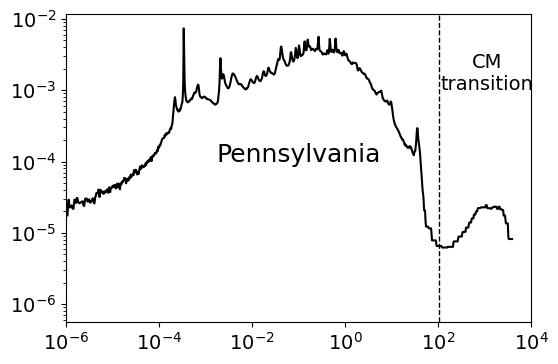

In [115]:
# Pennsylvania PDFs

selected_dfs = [CMAppalachia2021]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Pennsylvania_2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**3.05, 10**-3, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Pennsylvania', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/Pennsylvania PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

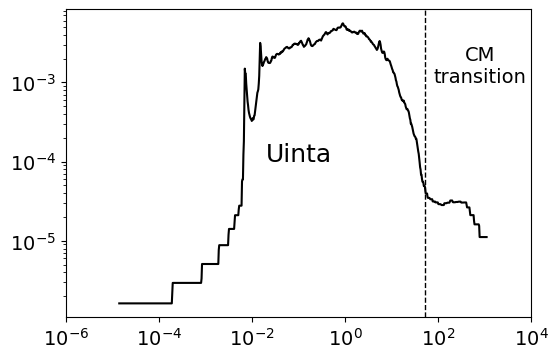

In [116]:
# Uinta PDFs

selected_dfs = [CMUinta2020]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Uinta_2020', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**2.9, 10**-3, 'CM\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Uinta', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/Uinta PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

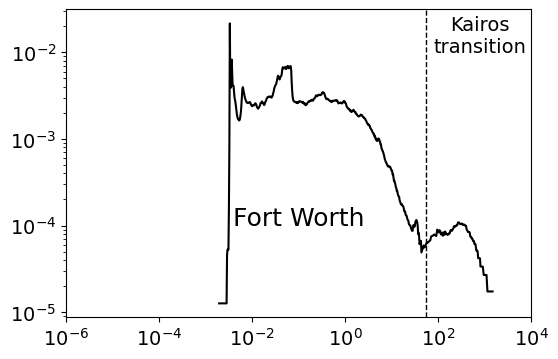

In [117]:
# Fort Worth PDFs

selected_dfs = [KairosBarnett]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)


# Transition points
plt.axvline(surveyStats.loc['Fort_Worth_2021', 'Transition point'], color=colors[0], linestyle='--', lw=1)
plt.text(10**2.9, 10**-2, 'Kairos\ntransition', size=14, color='black', rotation=0, ha='center')

plt.text(10**-1, 10**-4, 'Fort Worth', size=18, color='black', rotation=0, ha='center')

# plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
# plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figures/Fort Worth PDF 20221112.pdf', format='pdf', bbox_inches="tight")
# plt.show()

TROPOMI distribution

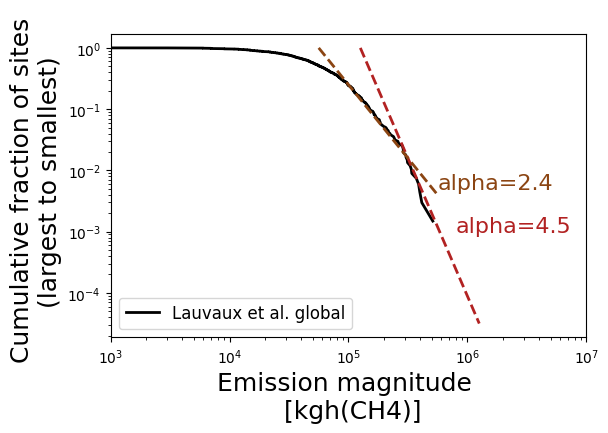

In [35]:
Kayrros_plumes = pd.read_excel('/Users/evansherwin/PycharmProjects/MethaneDistributions/CDF_data/S5P_ultra_emitters_2019_2020.xls', sheet_name="S5P_ultra_emitters_2019_2020")
Kayrros_plumes = Kayrros_plumes[Kayrros_plumes['category']=='og']


# Kayrros data prep
Kayrros_plumes_only = Kayrros_plumes['emissions_rate_tons_hour']*1000
Kayrros_plumes_pos = Kayrros_plumes_only[Kayrros_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Kayrros_num_plumes = Kayrros_plumes_pos.size
np.max(Kayrros_num_plumes)

# Kayrros power law fit
plfitKayrros = plfit.plfit(Kayrros_plumes_pos)
plfitKayrros._alpha, plfitKayrros._xmin

ax = plt.gca()
plt.loglog(Kayrros_plumes_pos.sort_values(ascending=False), np.arange(1, Kayrros_num_plumes + 1, 1)/Kayrros_num_plumes, linewidth=2, color="black")
ax.set_xlim(10**3, 10**7)
plt.loglog([10**5.1, 10**6.1], [10**-0, 10**-4.5],color='firebrick',
         linestyle='dashed',linewidth=2)
plt.loglog([10**4.75, 10**5.75], [10**-0, 10**-2.4],color='saddlebrown',
         linestyle='dashed',linewidth=2)
ax.text(10**5.75, 10**-2.3, 'alpha=2.4', fontsize=16, color='saddlebrown', rotation='horizontal')
ax.text(10**5.9, 10**-3, 'alpha=4.5', fontsize=16, color='firebrick', rotation='horizontal')
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.legend(['Lauvaux et al. global'],
           loc='lower left', fontsize=12)

plt.savefig('Figures/Kayrros loglog 20221108.pdf', format='pdf')
# plt.show()

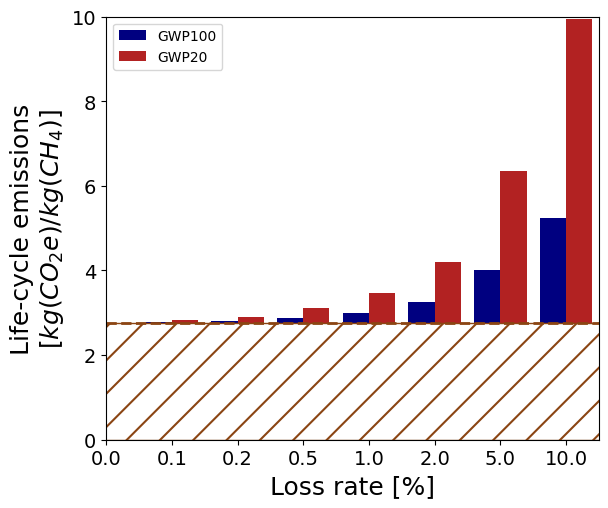

In [36]:
# Leakage rate illustration figure

# NG CO2 emissions of combustion
# kgCO2perMMBtuNG = 52.91 # https://www.eia.gov/environment/emissions/co2_vol_mass.php
kgCO2perkgMethane = 2.75 # https://www.engineeringtoolbox.com/co2-emission-fuels-d_1085.html
GWP100 = 25 # From IPCC AR4 https://www.epa.gov/sites/default/files/2021-02/documents/us-ghg-inventory-2021-annex-6-additional-information.pdf
GWP20 = 72
lossRate = np.array([0, 1, 2, 5, 10, 20, 50, 100])/1000 # In %
lifeCycleEmissionskgMethane = pd.DataFrame(lossRate)
lifeCycleEmissionskgMethane['Loss rate [%]'] = lossRate*100
lifeCycleEmissionskgMethane['Combustion emissions'] = kgCO2perkgMethane
lifeCycleEmissionskgMethane['GWP20'] = lossRate*GWP20
lifeCycleEmissionskgMethane['GWP100'] = lossRate*GWP100
#lifeCycleEmissionskgMethane

# fig = plt.figure()
# a1 = fig.add_axes([0,0,1,1])
ax = lifeCycleEmissionskgMethane.plot(x='Loss rate [%]', y=['GWP100', 'GWP20'], bottom=kgCO2perkgMethane, kind="bar", width=0.8, color=["navy", "firebrick"])
ax.set_ylim([0, 10])
ax.set_xlim([0, 7.5])
ax.axhline(kgCO2perkgMethane, color="saddlebrown", linestyle="--", lw=2)
ax.fill_between([-0.1, 10], kgCO2perkgMethane, 0, color='none', alpha=1, hatch="/", edgecolor="saddlebrown")
ax.set_xlabel('Loss rate [%]', fontsize=18)
ax.set_ylabel('Life-cycle emissions\n[$kg(CO_{2}e)$/$kg(CH_4)$]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
# ax.set_xlim([0, 0.1])# ax.set_xlim(10**-3, 10**4)
# plt.bar(lifeCycleEmissionskgMethane[0], lifeCycleEmissionskgMethane['GWP20'], bottom=lifeCycleEmissionskgMethane['Combustion emissions'], linewidth=2, color="firebrick")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (10,5)
# plt.savefig('Figures/Methane LCA by loss rate 20220204.pdf', format='pdf')
plt.show()

Draft figure for satellites paper

In [ ]:
# Fractional loss rates

fraction_to_percent = 100

KairosPermianLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Methane fractional loss total'].iloc[0]
CMPermianLossRate2019 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Methane fractional loss total'].iloc[0]
CMPermianLossRate2020 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Methane fractional loss total'].iloc[0]
CMPermianLossRateSummer2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Methane fractional loss total'].iloc[0]
CMPermianLossRateFall2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Methane fractional loss total'].iloc[0]
CALossRate20162017 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Methane fractional loss total'].iloc[0]
CALossRate2016 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Methane fractional loss total'].iloc[0]
CALossRate2017 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Methane fractional loss total'].iloc[0]
CALossRate2020COVID = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Methane fractional loss total'].iloc[0]
CALossRate2020 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Methane fractional loss total'].iloc[0]
CALossRate2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Methane fractional loss total'].iloc[0]
DJLossRateSummer2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Methane fractional loss total'].iloc[0]
DJLossRateFall2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Methane fractional loss total'].iloc[0]
AppalachiaLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Methane fractional loss total'].iloc[0]
UintaLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Methane fractional loss total'].iloc[0]
BarnettLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Methane fractional loss total'].iloc[0]

KairosPermianLossRate, CMPermianLossRate2019, CMPermianLossRateSummer2021, CMPermianLossRateFall2021, CALossRate20162017, CALossRate2016, CALossRate2017, CALossRate2020COVID, CALossRate2020, CALossRate2021, \
DJLossRateSummer2021, DJLossRateFall2021, AppalachiaLossRate, UintaLossRate, BarnettLossRate

In [ ]:
# Satellite visible fraction distributions

ax = plt.gca()
# Main plot
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], KairosPermianLossRate*(1 - kairosPermian['Cumulative emissions fraction [%]']), linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermianLossRate2019*(1 - CMPermian2019['Cumulative emissions fraction [%]']), linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CALossRate2020COVID*(1 - CMCA2020COVID['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CALossRate2017*(1 - CMCA2017['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CALossRate2016*(1 - CMCA2016['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dotted")
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CALossRate2021*(1 - CMCA2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dashdot")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CALossRate2020*(1 - CMCA2020['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dashed")
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], DJLossRateSummer2021*(1 - CMDJ2021Summer['Cumulative emissions fraction [%]']), linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], DJLossRateFall2021*(1 - CMDJ2021Fall['Cumulative emissions fraction [%]']), linewidth=2, color=colors[2], linestyle=(1, (1, 5)))
# plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], AppalachiaLossRate*(1 - CMAppalachia2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[3])
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], UintaLossRate*(1 - CMUinta2020['Cumulative emissions fraction [%]']), linewidth=2, color=colors[4], linestyle="solid")
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], BarnettLossRate*(1 - KairosBarnett['Cumulative emissions fraction [%]']), linewidth=2, color=colors[5], linestyle="solid")

plt.axvline(100, color=colors[0], linestyle="--", lw=1, label="Targeted")
plt.text(10**1.9, 5.1, 'Targeted', size=16, color='black', rotation=0, ha='center')
plt.axvline(1000, color=colors[0], linestyle="--", lw=1, label="Scanning")
plt.text(10**3.1, 5.1, 'Scanning', size=16, color='black', rotation=0, ha='center')

plt.text(10**1.4, 3, 'Uinta', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**3.4, 4, 'NM Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**3.5, 3, 'Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-0.2, 0.9, 'San Joaquin', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**2.5, 0.25, 'Barnett', size=16, color=colors[5], rotation=0, ha='center')
plt.text(10**3.5, 0.5, 'Denver', size=16, color=colors[3], rotation=0, ha='center')

# plt.legend(['Kairos NM Permian 2018-2020',
#             'CM Permian 2019',
#             'CM San Joaquin Su2020',
#             'CM San Joaquin 2017',
#             'CM San Joaquin 2016',
#             'CM San Joaquin 2021',
#             'CM San Joaquin F2020',
#             'CM Denver-Julesburg Su2021',
#             'CM Denver-Julesburg F2021',
#             'CM Pennsylvania 2021',
#             'CM Uinta 2021',
#             'Kairos Barnett 2021'],
#            loc='upper left', fontsize=12)
ax.set_ylim(0, 5)
ax.set_xlim(10**-1, 10**4)
plt.xlabel('Site emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative methane loss [%]', size=16)
# plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Satellites distributions 20221019.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Satellite min detect needed to guarantee a given fractional loss

ax = plt.gca()
# Main plot
plt.loglog(KairosPermianLossRate*(1 - kairosPermian['Cumulative emissions fraction [%]'])/fraction_to_percent, kairosPermian['Emission magnitude [kgh]'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMPermianLossRate2019*(1 - CMPermian2019['Cumulative emissions fraction [%]'])/fraction_to_percent, CMPermian2019['Emission magnitude [kgh]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.loglog(CALossRate2020COVID*(1 - CMCA2020COVID['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2020COVID['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(CALossRate2017*(1 - CMCA2017['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2017['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(CALossRate2016*(1 - CMCA2016['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2016['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dotted")
plt.loglog(CALossRate2021*(1 - CMCA2021['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2021['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dashdot")
plt.loglog(CALossRate2020*(1 - CMCA2020['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2020['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dashed")
plt.loglog(DJLossRateSummer2021*(1 - CMDJ2021Summer['Cumulative emissions fraction [%]'])/fraction_to_percent, CMDJ2021Summer['Emission magnitude [kgh]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.loglog(DJLossRateFall2021*(1 - CMDJ2021Fall['Cumulative emissions fraction [%]'])/fraction_to_percent, CMDJ2021Fall['Emission magnitude [kgh]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))
# plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], AppalachiaLossRate*(1 - CMAppalachia2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[3])
plt.loglog(UintaLossRate*(1 - CMUinta2020['Cumulative emissions fraction [%]'])/fraction_to_percent, CMUinta2020['Emission magnitude [kgh]'], linewidth=2, color=colors[4], linestyle="solid")
plt.loglog(BarnettLossRate*(1 - KairosBarnett['Cumulative emissions fraction [%]'])/fraction_to_percent, KairosBarnett['Emission magnitude [kgh]'], linewidth=2, color=colors[5], linestyle="solid")

plt.axvline(2*10**-3, color=colors[0], linestyle="--", lw=1, label="Targeted")
plt.text(10**-3.28, 10**3, 'Industry target\n0.2%', size=16, color='black', rotation=0, ha='center')
# plt.axvline(1000, color=colors[0], linestyle="--", lw=1, label="Scanning")
# plt.text(10**3.1, 5.1, 'Scanning', size=16, color='black', rotation=0, ha='center')
#
plt.text(10**-1.4, 10**0.9, 'Uinta', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**3.4, 4, 'NM Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-1.5, 10**1.9, 'Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-2.2, 10**-0.7, 'San Joaquin', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**-2.82, 10**1, 'Barnett', size=16, color=colors[5], rotation=0, ha='center')
plt.text(10**-3.5, 10**0.1, 'Denver', size=16, color=colors[3], rotation=0, ha='center')

ax.set_xlim(10**-4, 10**-1)
ax.set_ylim(10**-1, 10**4)
plt.ylabel('Minimum sensitivity needed\n[kg(CH4)/hr]', size=16)
plt.xlabel('Target methane loss [%]', size=16)
# plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Satellites min detect 20221019.pdf', format='pdf', bbox_inches="tight")
# plt.show()


Aerially measured emissions by non-OG source category

In [ ]:
# Key variables for CDFs of aerially measured emissions by source category

source_category_all = ["Production", "Midstream", "Coal", "Waste management", "Agriculture", "Power plant", "Unknown"]
source_category_to_include = ["Coal", "Waste management", "Agriculture", "Power plant", "Unknown"]
kg_per_t = 1000
percent_per_unit = 100
# CMPermianByCat2019
# CMPermianByCat2019['Value'] = pd.to_numeric(CMPermianByCat2019['Value'], errors='coerce')
# CMPermianByCat2019.loc[CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]', 'Value'].describe()

In [ ]:
# Cumulative emissions Permian by source category

ax = plt.gca()
# Main plot
# plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
# CMPermianByCat2019.loc[CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions fraction [%]', 'CM_broad_category1']

# for jj in np.arange(len(source_category_to_include)):
#     plt.semilogx(CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'], CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'], color=colors[jj])
#
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProd2019*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
    plt.semilogx(CMPermianByCat2020.loc[(CMPermianByCat2020['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2020['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2020.loc[(CMPermianByCat2020['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2020['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProd2020*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))
    plt.semilogx(CMPermianByCat2021Summer.loc[(CMPermianByCat2021Summer['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2021Summer['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2021Summer.loc[(CMPermianByCat2021Summer['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2021Summer['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProdSummer2021 *kg_per_t/percent_per_unit), color=colors[jj], linestyle='dotted')
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMPermianByCat2021Fall.loc[(CMPermianByCat2021Fall['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2021Fall['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2021Fall.loc[(CMPermianByCat2021Fall['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2021Fall['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProdFall2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashdot')

plt.text(10**1.1, 0.15, 'Unknown', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**1.2, 0.13, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Permian distributions by category 20221022b.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions San Joaquin by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMCA2020COVIDByCat.loc[(CMCA2020COVIDByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2020COVIDByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2020COVIDByCat.loc[(CMCA2020COVIDByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2020COVIDByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2020COVID*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
    plt.semilogx(CMCA2020ByCat.loc[(CMCA2020ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2020ByCat.loc[(CMCA2020ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2020*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))
    plt.semilogx(CMCA2021ByCat.loc[(CMCA2021ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2021ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2021ByCat.loc[(CMCA2021ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2021ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashdot')

# plt.text(10**1.5, 0.3, 'Waste management,\npower plant', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**1, 3, 'Agriculture', size=16, color=colors[4], rotation=0, ha='center')

ax.set_ylim(0, 5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/San Joaquin distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions San Joaquin by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMDJ2021SummerByCat.loc[(CMDJ2021SummerByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMDJ2021SummerByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMDJ2021SummerByCat.loc[(CMDJ2021SummerByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMDJ2021SummerByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(DJMethaneProdSummer2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMDJ2021FallByCat.loc[(CMDJ2021FallByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMDJ2021FallByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMDJ2021FallByCat.loc[(CMDJ2021FallByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMDJ2021FallByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(DJMethaneProdFall2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))

plt.text(10**1.2, 0.07, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**1, 0.17, 'Agriculture', size=16, color=colors[2], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Denver-Julesburg distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Pennsylvania by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMAppalachiaByCat2021.loc[(CMAppalachiaByCat2021['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMAppalachiaByCat2021['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMAppalachiaByCat2021.loc[(CMAppalachiaByCat2021['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMAppalachiaByCat2021['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(AppalachiaMethaneProd*kg_per_t/percent_per_unit), color=colors[jj])
plt.text(10**2.2, 0.43, 'Coal', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**1.2, 0.1, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Pennsylvania distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Uinta by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMUinta2020ByCat.loc[(CMUinta2020ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMUinta2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMUinta2020ByCat.loc[(CMUinta2020ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMUinta2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(UintaMethaneProd*kg_per_t/percent_per_unit), color=colors[jj])
plt.text(10**1.2, 0.13, 'Coal', size=16, color=colors[0], rotation=0, ha='center')
# plt.text(10**1.2, 0.13, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Figures/Uinta distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
campaigns_to_include = ["Kairos Permian","Permian/2019","Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Appalachia/2021", "Uinta/2020",
                        "Kairos Barnett"]
surveyStats_to_include = surveyStatsAerialByCat.set_index("Basin/Campaign")
surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include].apply(pd.to_numeric, errors='coerce')
# tot_emissions_by_campaign = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include['Total covered production (t(CH4)/hr)'] = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include = 100*surveyStats_to_include.div(surveyStats_to_include['Total covered production (t(CH4)/hr)'], axis=0)
surveyStats_to_include

In [ ]:
ax = plt.gca()
campaigns_to_include = ["Kairos Permian","Permian/2019","Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Appalachia/2021", "Uinta/2020",
                        "Kairos Barnett"]
pct_per_unit = 100

surveyStats_to_include = surveyStatsAerialByCat.set_index("Basin/Campaign")
surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include].apply(pd.to_numeric, errors='coerce')
# tot_emissions_by_campaign = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include['Total covered production (t(CH4)/hr)'] = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include = pct_per_unit*surveyStats_to_include.div(surveyStats_to_include['Total covered production (t(CH4)/hr)'], axis=0)

source_type_to_include = ['Coal', 'Waste', 'Agriculture', 'PowerPlant', 'Unknown']

fractionalLossDF = surveyStats_to_include[source_type_to_include]

# errorbars = np.concatenate((np.zeros([6, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,5,4]], ax=ax)
# fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,5,4]], yerr=errorbars, ax=ax)
plt.yticks(fontsize=14)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xlabel('')

hatch_marks = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['High prod']
hatches = np.append(hatch_marks,
                    np.append(hatch_marks,
                              np.append(hatch_marks,
                                        np.append(hatch_marks,
                                                   np.append(hatch_marks,
                                                   hatch_marks)))))
for patch, hatch in zip(fractionalLossPlot.patches, hatches):
   patch.set_hatch(hatch)
plt.rcParams['hatch.linewidth'] = 1.5
plt.rcParams['hatch.color'] = 'white'

# fractionalLossPlot.set_xticklabels(fractionalLossPlot.get_xticklabels(), fontsize=14, rotation=45, horizontalalignment='right', rotation_mode='anchor')
fractionalLossPlot.set_xticklabels(['Kairos 2018-2020', 'CM 2019', 'CM 2020', 'CM Summer 2021', 'CM Fall 2021', 'CM 2016', 'CM 2017', 'CM Summer 2020', 'CM Fall 2020', 'CM Fall 2021', 'CM Fall 2021', 'CM Summer 2021', 'CM 2021', 'CM 2020', 'Kairos 2021'], fontsize=12, rotation=45, horizontalalignment='right', rotation_mode='anchor')
# letterheight = 5.6
letterheight = 4.2
plt.text(0.05, letterheight, 'NM', fontsize=15, color='black', rotation=0, ha='center') # -63
plt.text(2.5, letterheight, 'Permian', fontsize=15, color='black', rotation=0, ha='center') # -63
plt.text(6.8, letterheight, 'San Joaquin', fontsize=15, color='black', rotation=0, ha='center') # -70
plt.text(10.5, letterheight, 'DJ', fontsize=15, color='black', rotation=0, ha='center') # -64
plt.text(12, letterheight, 'PA', fontsize=15, color='black', rotation=0, ha='center') # -68
plt.text(13, letterheight, 'U', fontsize=15, color='black', rotation=0, ha='center') # -55
plt.text(14, letterheight, 'FW', fontsize=15, color='black', rotation=0, ha='center') # -55
plt.axvline(0.6, ls='--', linewidth=1, color='black', ymin=-70)
plt.axvline(4.45, ls='-', linewidth=1, color='black', ymin=-70)
# plt.axvline(6.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.55, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(11.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(12.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(13.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.legend([])
fractionalLossPlot.get_legend().remove()
plt.savefig('Figures/Loss rates non-O&G 20221022b.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Loss rates by visit 20221018.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Figures/Loss rates no strat 20220919.pdf', format='pdf', bbox_inches="tight")
# plt.show()

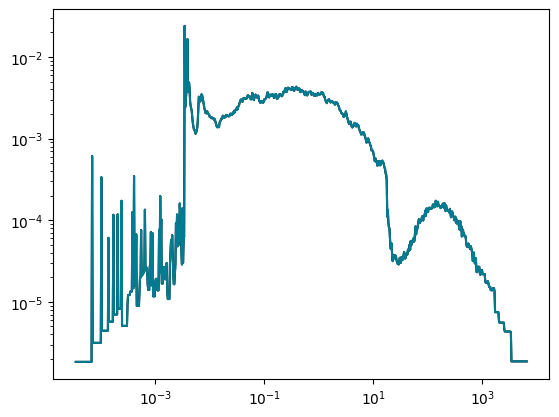

In [295]:
df = kairosPermian
x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction missed partial detect sites']

# Simulation-only PDFs
# x = np.log10(df.loc[df['Emission magnitude Rutherford [kgh]'] > 0,'Emission magnitude Rutherford [kgh]'])
# y = df.loc[df['Emission magnitude Rutherford [kgh]'] > 0, 'Cumulative fraction of sites']

# x_even_log_space, yfit_even =  ecdfToLogLogPDF (df, knot_numbers=100)
y_interp = scipy.interpolate.interp1d(x, y)
partial_detect_interp = scipy.interpolate.interp1d(10**x, partial_detect)
xx = np.arange(x.min(), x.max(), 0.01)
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:], color=colors[0])
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 - pd.DataFrame(partial_detect_interp(10**xx)).diff()[0][1:]), color=colors[1])
# pd.DataFrame(y_interp(xx[580:600])).diff()[0][1:]*(1-pd.DataFrame(partial_detect_interp(10**xx[580:600])).diff()[0][1:])
# 10**xx[580:600], (1-pd.DataFrame(partial_detect_interp(10**xx[580:600])).diff()[0][1:])
# partial_detect_interp(xx)
# xx

In [312]:
offset = 200
partial_detect[partial_detect.shape[0]-20-offset:partial_detect.shape[0]-offset]

17736    0.000594
17737    0.000549
17738    0.000509
17739    0.000470
17740    0.000434
17741    0.000400
17742    0.000368
17743    0.000339
17744    0.000311
17745    0.000286
17746    0.000263
17747    0.000241
17748    0.000220
17749    0.000201
17750    0.000183
17751    0.000166
17752    0.000151
17753    0.000136
17754    0.000123
17755    0.000111
Name: Cumulative fraction missed partial detect sites, dtype: float64

In [ ]:
df = CMCA2016
x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']

# x_even_log_space, yfit_even =  ecdfToLogLogPDF (df, knot_numbers=100)
y_interp = scipy.interpolate.interp1d(x, y)
xx = np.arange(x.min(), x.max(), 0.01)

# Drops the NaN introduced at the beginning of the y.diff() and drops the last element of x for consistency
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:])
# plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max() - pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum())
# plt.loglog(10**(xx[:-1]), 1 - pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum())
# plt.loglog(10**x, 1 - y)
# yfit_even.diff()
# plt.plot(x_even_log_space, yfit_even.diff()[0])
# plt.plot(x_even_log_space, yfit_even)
plt.xlim(10**-6, 10**4)

In [162]:
# pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()
pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()

0.9613123418916111

In [131]:
pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()

1.103945123244866

In [ ]:
# ax = plt.gca()

plt.plot(x, yfit)
plt.plot(x, y, linewidth=2, color=colors[0], linestyle='solid')

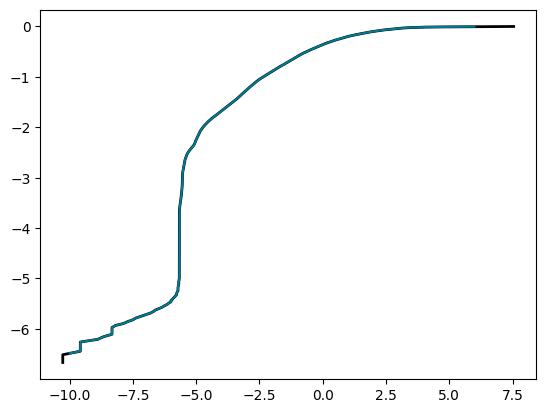

In [19]:
y_interp = scipy.interpolate.interp1d(x, y)

#find y-value associated with x-value of 13
xx = np.arange(-10, 6.01, 0.01)
plt.plot(x, y, linewidth=2, color=colors[0], linestyle='solid')
plt.plot(xx, y_interp(xx), color=colors[1])


In [ ]:
# Adapted from https://fda.readthedocs.io/en/stable/auto_examples/plot_kernel_smoothing.html#sphx-glr-auto-examples-plot-kernel-smoothing-py
fd = pd.DataFrame({'xx':xx, 'y_interp':pd.DataFrame(y_interp(xx)).diff()[0]})
scale_factor = (
    (fd.domain_range[0][1] - fd.domain_range[0][0])
    / len(fd.grid_points[0])
)



In [112]:
import itertools
fd_os.grid_points[0],  fd_os.data_matrix[0][:, 0].transpose()# np.array(list(itertools.chain(*fd_os.data_matrix))).transpose()

(array([-9.99, -9.98, -9.97, ...,  5.98,  5.99,  6.  ]),
 array([9.95356736e-04, 9.95356736e-04, 9.95356736e-04, ...,
        3.96109603e-05, 3.94481264e-05, 3.94233805e-05]))

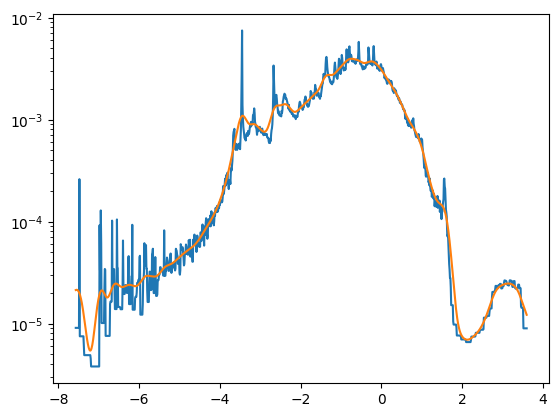

In [158]:
# fig, ax = plt.gca()
# Removes the NaN introduced by differencing
fd_grid = FDataGrid(pd.DataFrame(y_interp(xx)).diff()[0][1:], xx[1:])
fd_os = ks.NadarayaWatsonSmoother(smoothing_parameter=0.1,).fit_transform(fd_grid)
# fd_os = KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=1),
#                        ).fit_transform(fd)
# fd_grid
# fd_os.plot()
plt.semilogy(xx[1:], pd.DataFrame(y_interp(xx)).diff()[0][1:])
plt.semilogy(fd_os.grid_points[0], fd_os.data_matrix[0][:, 0].transpose())
# plt.semilogy(fd_grid.grid_points[0], fd_grid.data_matrix[0][:, 0].transpose())
# plt.xlim(-5, 6)
# plt.plot(xx, pd.DataFrame(y_interp(xx)).diff()[0])

Plot midstream emission cumulative emissions function

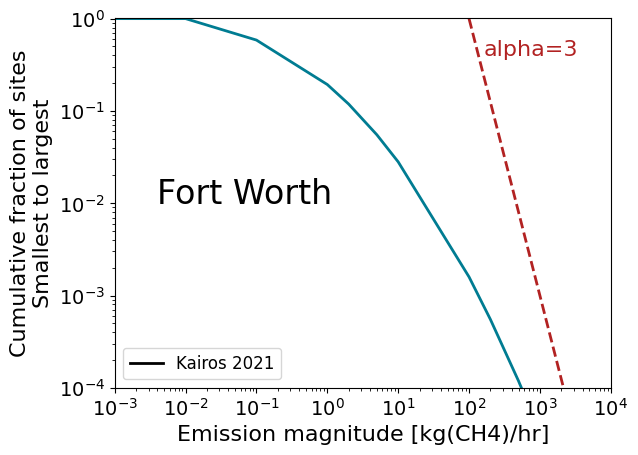

In [348]:
# Cumulative loglog midstream emissions Fort Worth

ax = plt.gca()

# Loglog of full distribution
plt.loglog(KairosBarnettMidstream['Emission magnitude [kgh]'], 1 - KairosBarnettMidstream['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Min detected
# plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.9, 0.8, 'Kairos\n min detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fit
# BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett['Emission magnitude [kgh]'])
BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2])
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**2, 10**4], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.0001, 1.01)
# ax.set_ylim(10**-1, 10**0)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 10**-2, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.savefig('Figures/Fort Worth midstream distribution loglog 20221106.pdf', format='pdf', bbox_inches="tight")
plt.show()


In [450]:
kairosPermianMidstream



,Emission magnitude [kgh],Cumulative aerial emissions [kgh],Cumulative partial emissions [kgh],Cumulative aerial emissions fraction [%],Cumulative partial emissions fraction [%],Cumulative fraction of sites
0,0.000000,73601.417644,6253.928186,0.921682,0.078318,NaN
1,0.000000,73601.417644,6253.928186,0.921682,0.078318,NaN
2,5.411589,73596.006055,6253.928186,0.921614,0.078318,NaN
3,9.060625,73586.945430,6253.928186,0.921500,0.078318,NaN
4,10.286994,73576.658436,6253.928186,0.921371,0.078318,NaN
...,...,...,...,...,...,...
411,1180.033062,6341.914870,1130.028408,0.079398,0.014152,NaN
412,1254.960146,5086.954724,815.317637,0.063684,0.010210,NaN
413,1361.326179,3725.628546,463.153822,0.046638,0.005800,NaN
414,3725.628546,0.000000,0.000000,0.000000,0.000000,NaN
